In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/clean_data.csv', index_col=0)

In [4]:
df.head()

,id,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count
0,1478637395289378817,2022-01-05,966573471663828992,pymesmagazine,PymesMagazine,¿Quieres formarte en una de las profesiones qu...,0,0,3
1,1479787660910768132,2022-01-08,10045342,cmarchena,Carlos A. Marchena,"@cbusquets Hola, @TheBridge_Tech te da la opci...",0,0,4
2,1480228635294449667,2022-01-09,183583012,ing_titiritero,Ingeniero Titiritero,Me encantaría saber que les enseñan sobre esta...,0,0,0
3,1481340966866989063,2022-01-12,41545659,nodosenlared,Mario Lopez de Avila,Ciclo de Conferencias sobre Inteligencia Artif...,0,1,6
4,1483469787078533123,2022-01-18,1162694149956603904,thebridge_tech,The Bridge,Del periodismo al marketing digital 🤸 esta es ...,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              281 non-null    int64 
 1   date            281 non-null    object
 2   user_id         281 non-null    int64 
 3   username        281 non-null    object
 4   name            281 non-null    object
 5   tweet           281 non-null    object
 6   replies_count   281 non-null    int64 
 7   retweets_count  281 non-null    int64 
 8   likes_count     281 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 22.0+ KB


# ¿Cuál es el tweet con mayor repercusión social? 

### Tweet con más likes

In [89]:
pd.set_option('display.max_colwidth', None )

In [92]:
df.sort_values(by='likes_count', ascending=False).iloc[:1,:]

,id,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,month
256,1542206287915585536,2022-06-29,1255794072280842240,heavymental_es,Heavy Mental,El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp,2,3,23,6


### Tweet con más replies y retweets

In [7]:
df.sort_values(by='retweets_count', ascending=False).iloc[:1,:]

,id,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count
195,1541046264539893760,2022-06-26,1255794072280842240,heavymental_es,Heavy Mental,"🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30...",6,7,17


# ¿Cuál es el usuario que más menciona a la escuela? 

### The Bridge & Heavy Mental

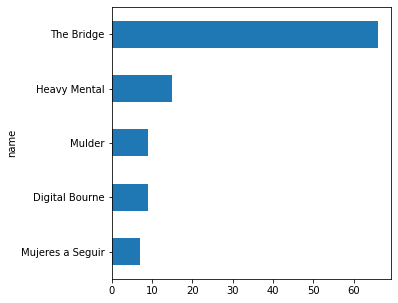

In [125]:
plt.figure(figsize=(5,5))
df.groupby('name').count()['id'].sort_values().tail(5).plot(kind='barh')
plt.savefig("images/users.png")

# ¿En qué mes se concentra el mayor número de tweets?

### Junio (100 tweets)

In [9]:
df['date'] = pd.to_datetime(df.date)

In [10]:
months = []
for date in df.date:
    months.append(date.month)
df['month'] = months

In [117]:
filter = {'1':'Enero','2':'Febrero','3':'Marzo','4':'Abril','5':'Mayo','6':'Junio','7':'Julio'}

In [122]:
df['month'] = df['month'].astype(str).replace(filter)
df_group = df.groupby('month').count()['id'].sort_values(ascending=False)
df_group

month
Junio      100
Mayo        50
Abril       49
Marzo       27
Febrero     23
Enero       17
Julio       15
Name: id, dtype: int64

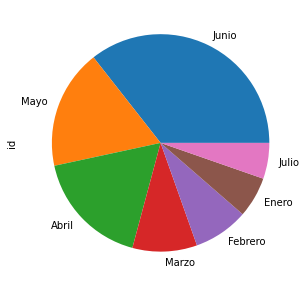

In [124]:
plt.figure(figsize=(5,5))
df.groupby('month').count()['id'].sort_values(ascending=False).plot(kind='pie')
plt.savefig("images/months.png")

# ¿Qué palabras son más frecuentes?

### Gracias, Digital, Talento, Futuro y Entradas

In [77]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re
def remove_stopwords(df):
    spanish_stopwords = stopwords.words('spanish')
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

def signs_tweets(tweet):
    signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
    return signos.sub('', tweet.lower())

In [78]:
    tweets = df.tweet
    words = []
    for tweet in tweets:
        text = pd.Series(tweet)
        test_clean = pd.DataFrame(text, columns=['content'])
        test_clean['content_clean'] = test_clean['content'].apply(signs_tweets)
        test_clean['content_clean'] = test_clean['content_clean'].apply(remove_links)
        test_clean['content_clean'] = test_clean['content_clean'].apply(remove_stopwords)
        words = words + test_clean['content_clean'][0].split()

In [76]:
pd.Series(words).value_counts()[8:].head(15)

si               25
gracias          21
#bootcamp        20
digital          19
hoy              18
talento          16
#datascience     15
@nodosenlared    15
futuro           13
@mulder          12
entradas         12
madrid           12
@heavymental     11
@arey            11
formación        11
dtype: int64

# ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

In [13]:
df_corr = df.iloc[:,-4:-1]
df_corr.corr()

,replies_count,retweets_count,likes_count
replies_count,1.000000,0.187587,0.322007
retweets_count,0.187587,1.000000,0.516970
likes_count,0.322007,0.516970,1.000000


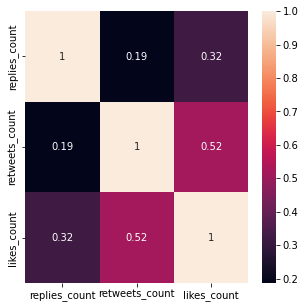

In [126]:
plt.figure(figsize=(5,5))
sns.heatmap(df_corr.corr(), annot=True);
plt.savefig("images/heatmap.png")
